In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BHARTIARTL_Indian_Stock.csv to BHARTIARTL_Indian_Stock.csv


# **Reading CSV**

In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['BHARTIARTL_Indian_Stock.csv']))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-04,553.549988,585.000000,549.799988,573.150024,571.098816,818083.0
1,2020-06-05,590.000000,590.000000,567.700012,584.900024,582.806824,1513499.0
2,2020-06-08,589.950012,593.700012,579.549988,584.750000,582.657288,838800.0
3,2020-06-09,580.000000,591.750000,566.000000,567.599976,565.568665,462101.0
4,2020-06-10,570.049988,576.000000,563.299988,567.250000,565.219910,474220.0


In [4]:
df.shape

(252, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,527.130876,533.410957,518.037450,524.888644,524.525717,7.491988e+05
std,49.035098,49.116702,48.513017,48.720658,48.419642,5.654613e+05
min,397.299988,404.549988,394.049988,397.250000,397.250000,1.297950e+05
25%,503.699997,508.475006,494.000000,502.975006,502.975006,3.789685e+05
50%,531.849976,536.000000,524.799988,530.150024,530.150024,5.894380e+05
75%,563.475006,571.475006,555.024994,560.699982,560.225006,9.523245e+05
max,618.299988,623.000000,599.549988,608.799988,608.799988,3.906544e+06


In [6]:
#Checking datatypes, null values, duplicates and unique values
dataframe = pd.DataFrame({'Dtypes':df.dtypes, 'Null_values':df.isnull().sum,'Duplicates': df.duplicated().sum(),'unique': df.nunique()})
dataframe

,Dtypes,Null_values,Duplicates,unique
Date,object,<bound method DataFrame.sum of Date Op...,0,252
Open,float64,<bound method DataFrame.sum of Date Op...,0,221
High,float64,<bound method DataFrame.sum of Date Op...,0,230
Low,float64,<bound method DataFrame.sum of Date Op...,0,235
Close,float64,<bound method DataFrame.sum of Date Op...,0,242
Adj Close,float64,<bound method DataFrame.sum of Date Op...,0,243
Volume,float64,<bound method DataFrame.sum of Date Op...,0,251


In [7]:
#Converting Datatype of Date to datetime
df.Date=pd.to_datetime(df.Date)

In [8]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

# **Data visualization**

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
features = ['Open', 'High', 'Low', 'Volume']

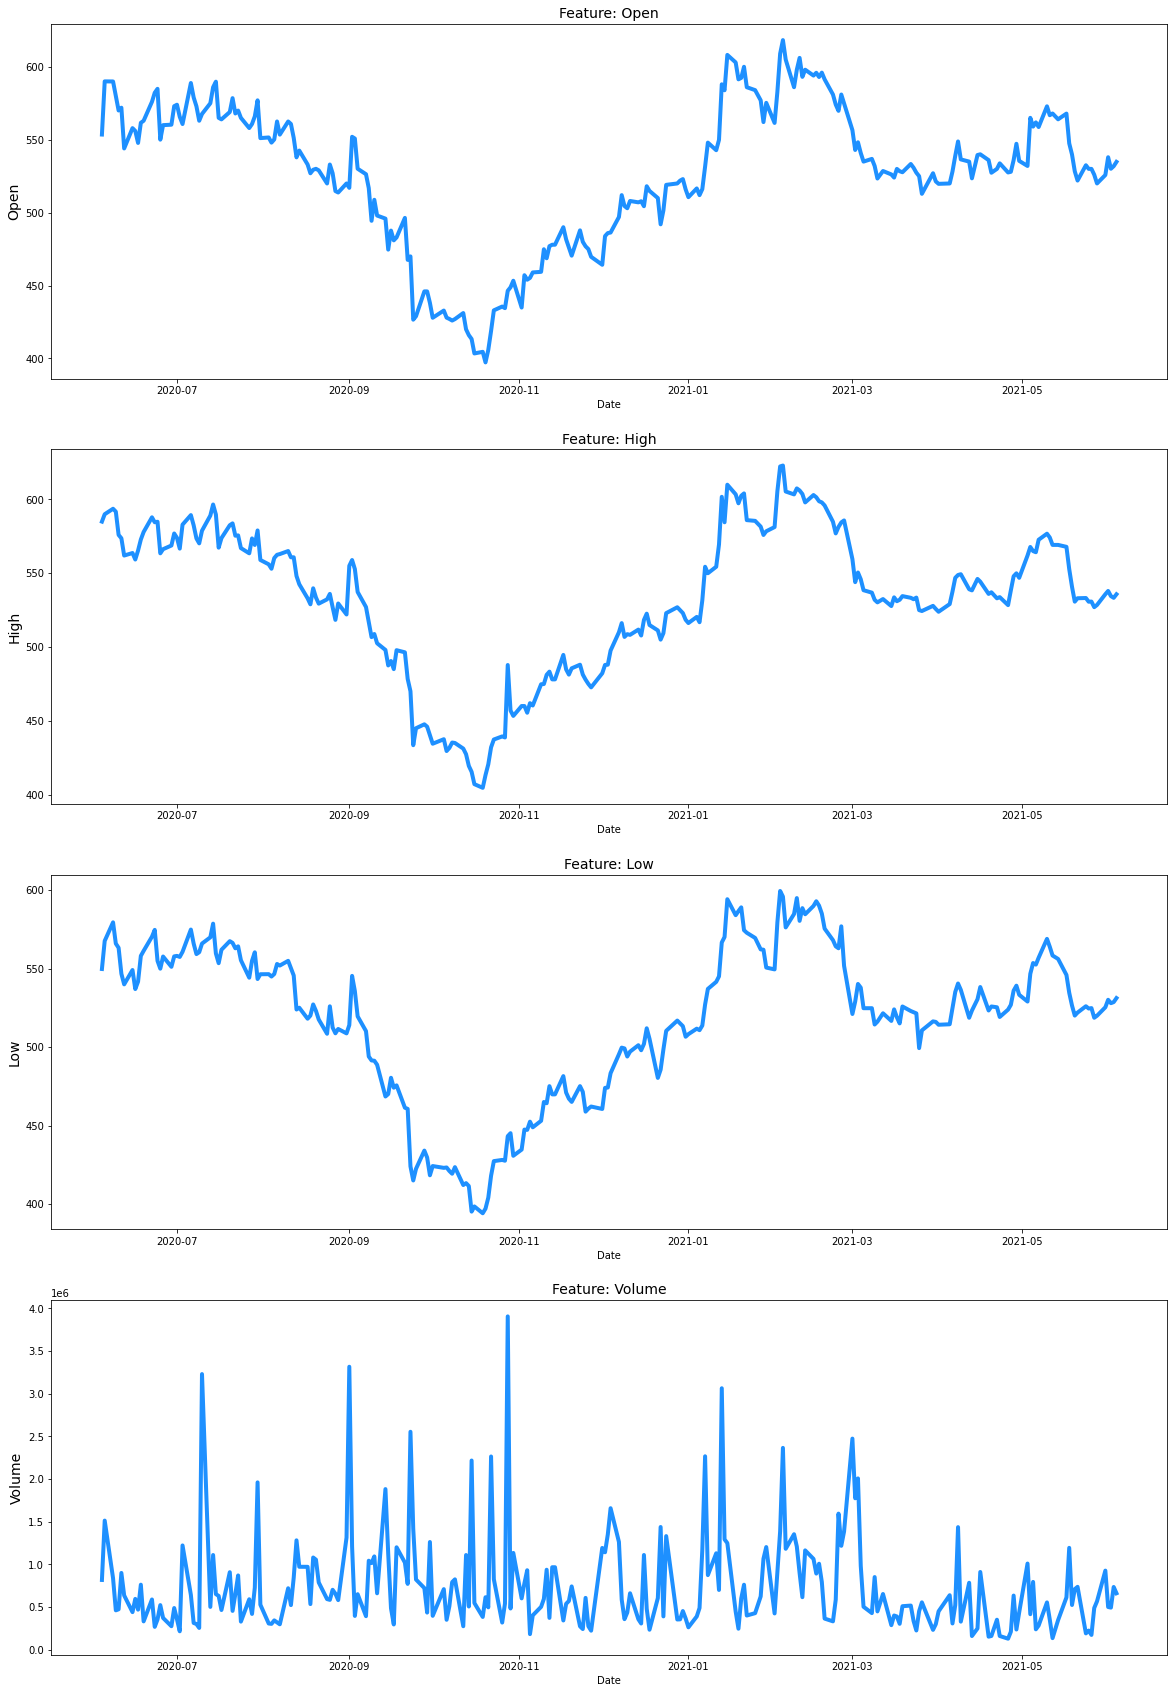

In [11]:
#Plotting for all features with respect to Date
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 30))

for i, column in enumerate(features):
    sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue', linewidth=4)
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    
                      

# **Data Pre-processing**

In [12]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [13]:
#here we are only concentarting on Close Feature. Hence dropping other columns
df.drop(['Adj Close','Open','High','Volume','Low'], axis=1, inplace=True)

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

# **Stationarity Check**

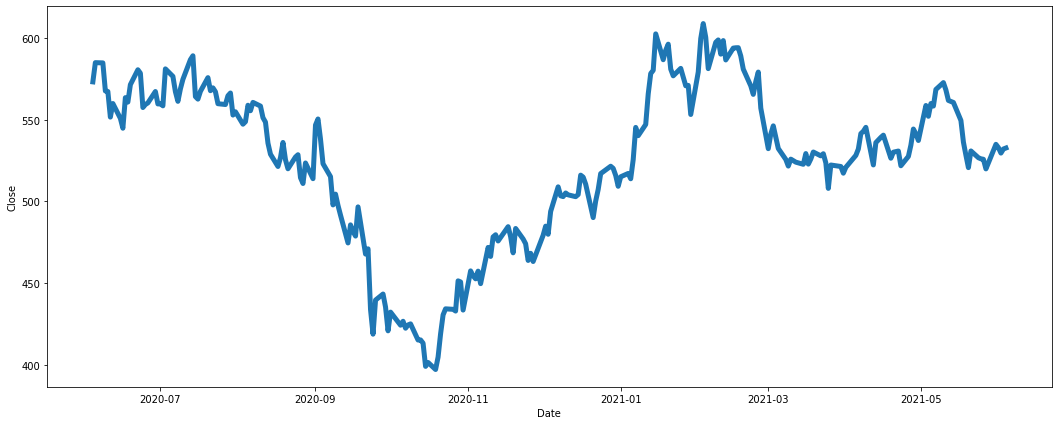

In [16]:
ax=plt.figure(figsize=(18,7))
sns.lineplot( x = df['Date'], y = df['Close'], linewidth = 5)


Graph looks Non-stationary as the mean keep increasing, However we check using Mean and variance

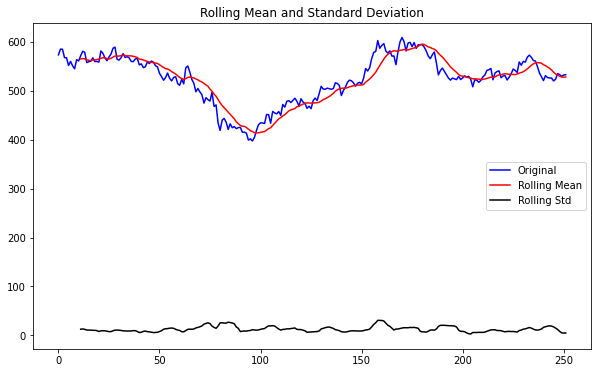

In [35]:
df_close = df['Close']

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.title('Rolling Mean and Standard Deviation')
    plt.legend(loc='best')
    plt.show(block=False)
    
test_stationarity(df_close)


Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

**ADF (Augmented Dickey-Fuller) Test**

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not.

In [18]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Close'], autolag = 'AIC')

print("1 ADF:", dftest[0])
print("1 P value:", dftest[1])
print("1 No.of Lags:", dftest[2])
print("1 No.of observations used for ADF Regression and critical values Calculation:", dftest[3])
print("5 Critical values:")
for key, val in dftest[4].items():
  print("\t", key, ": ", val)

1 ADF: -1.8172117908882242
1 P value: 0.3719506167668386
1 No.of Lags: 0
1 No.of observations used for ADF Regression and critical values Calculation: 250
5 Critical values:
	 1% :  -3.456780859712
	 5% :  -2.8731715065600003
	 10% :  -2.572968544


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis.  so the data is non-stationary.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series.

<Figure size 432x288 with 0 Axes>

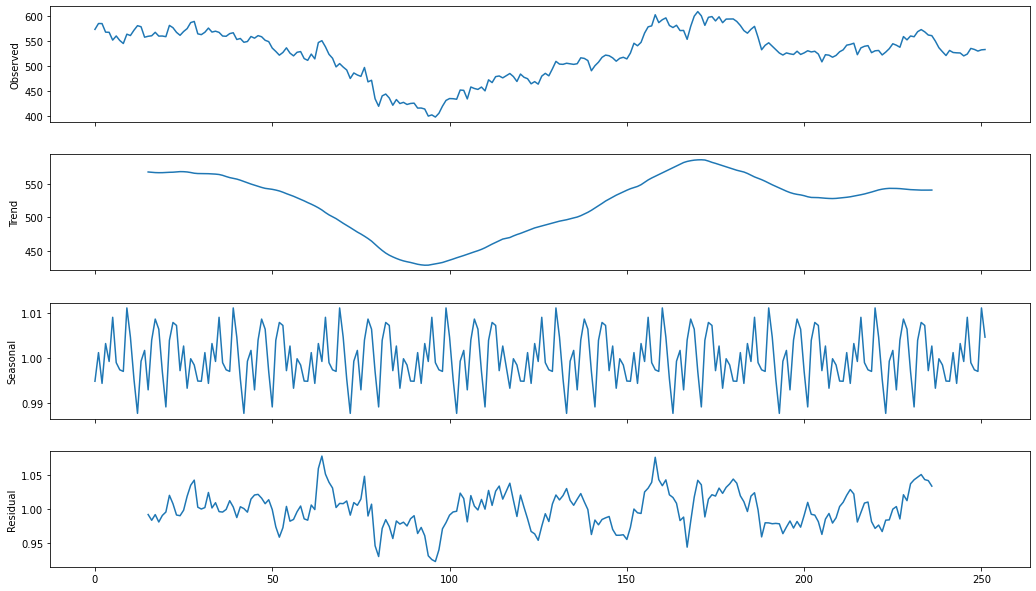

In [19]:
#Decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

# **Log_transformation and differencing**

If the data is not stationary but we want to use a model such as ARIMA (that requires this characteristic), the data has to be transformed.

The two most common methods to transform series into stationarity ones are:

**Transformation:** e.g. log or square root to stabilize non-constant variance
**Differencing:** subtracts the current value from the previous

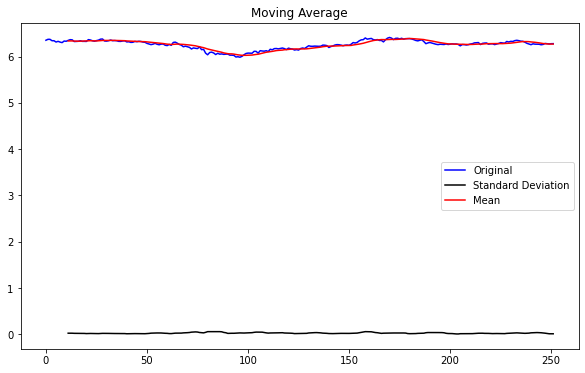

In [36]:
#logTransformation
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.title('Moving Average')
plt.plot(df_log, color='blue',label='Original')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

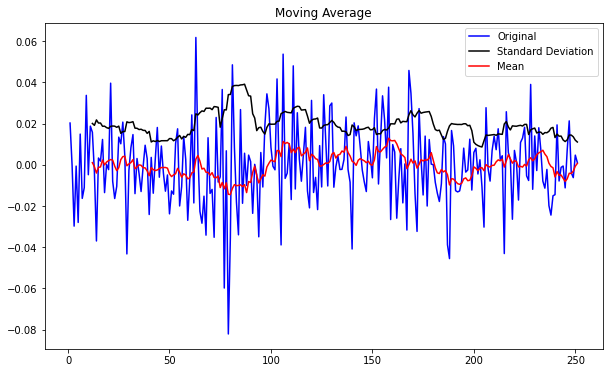

In [37]:
#Applying differencing to Log_values
df_log_diff = df_log-df_log.shift()
moving_avg = df_log_diff.rolling(12).mean()
std_dev = df_log_diff.rolling(12).std()
plt.title('Moving Average')
plt.plot(df_log_diff, color='blue',label='Original')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

we can see the constant mean and standard deviation and hence our series is stationary.

In [22]:
dftest1 = adfuller(df_log_diff.dropna())

print("1 ADF:", dftest1[0])
print("1 P value:", dftest1[1])
print("1 No.of Lags:", dftest1[2])
print("1 No.of observations used for ADF Regression and critical values Calculation:", dftest1[3])
print("5 Critical values:")
for key, val in dftest1[4].items():
  print("\t", key, ": ", val)

1 ADF: -17.269327400783762
1 P value: 5.874296375949637e-30
1 No.of Lags: 0
1 No.of observations used for ADF Regression and critical values Calculation: 249
5 Critical values:
	 1% :  -3.4568881317725864
	 5% :  -2.8732185133016057
	 10% :  -2.5729936189738876


In addtion to the above mean and std confirmation, we can also check the P value applied on log values which is below 0.05. Hence, graph is stationary

# **Autocorrelation Analysis**

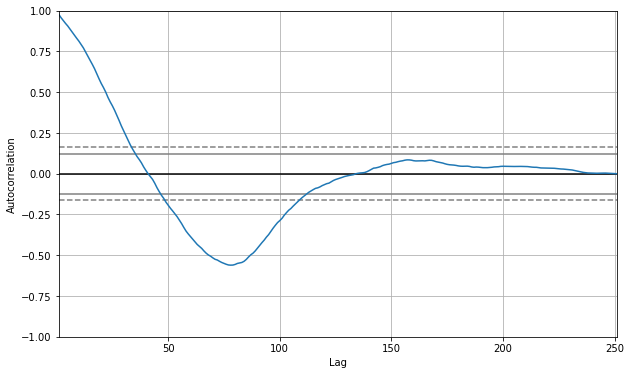

In [23]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_log)
plt.show()

**ACF and PACF plots:** After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series.

By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.

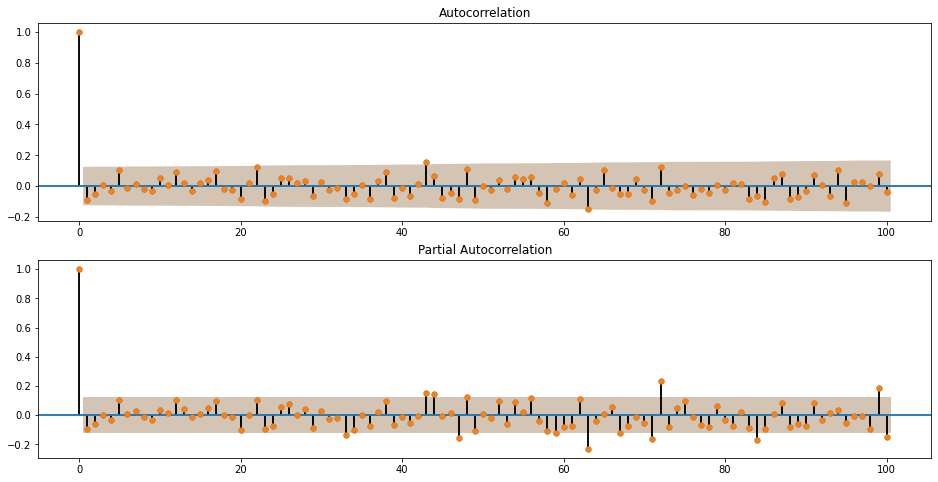

In [64]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


plot_acf(df_log_diff.dropna(), lags=100, ax=ax[0])
plot_pacf(df_log_diff.dropna(), lags=100, ax=ax[1])

# **Modeling**

Identification of an AR model is often best done with the PACF.
Identification of an MA model is often best done with the ACF rather than the PACF.

(p,d,q) 
p-->AR model lags
d--> differencing 
q-->MA lags.

Here p= 0,d= 1 and q= 0

In [45]:
df_log
df_log.index = pd.to_datetime(df.Date)


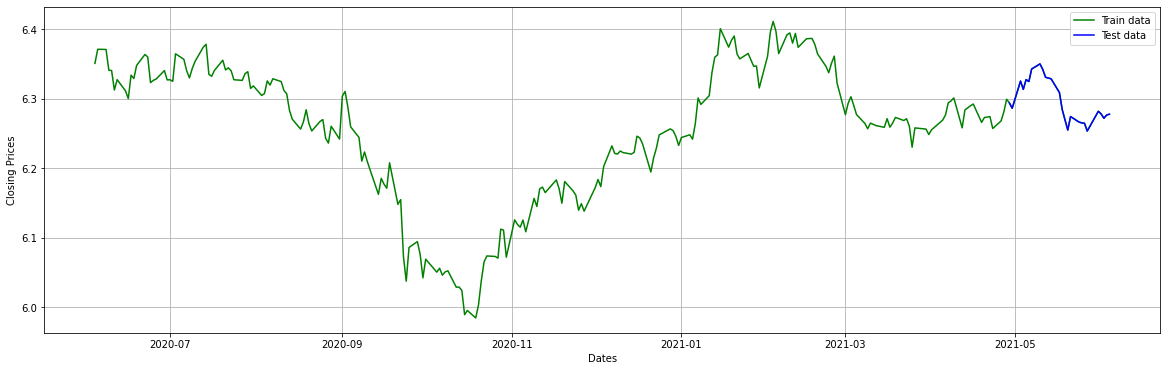

In [46]:
#split data into train and training set
train_data, test_data = df_log[1:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(20,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [47]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data, order = (0,1,0))
model = model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  223
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 549.363
Method:                           css   S.D. of innovations              0.021
Date:                Sat, 05 Jun 2021   AIC                          -1094.726
Time:                        05:49:09   BIC                          -1087.912
Sample:                             1   HQIC                         -1091.975
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.234      0.815      -0.003       0.002
==============================================================================
"""

In [48]:
#make Predictions on Test set

start = len(train_data)
end = len(train_data)+len(test_data)-1
pred = model.predict(start = start, end = end, typ = 'levels')
print(pred.head())

223    6.299178
224    6.298855
225    6.298533
226    6.298210
227    6.297888
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [49]:
#Converting the Index into Date Format
pred.index = df.Date[start:end+1]
print(pred.head())

Date
2021-04-28    6.299178
2021-04-29    6.298855
2021-04-30    6.298533
2021-05-03    6.298210
2021-05-04    6.297888
dtype: float64


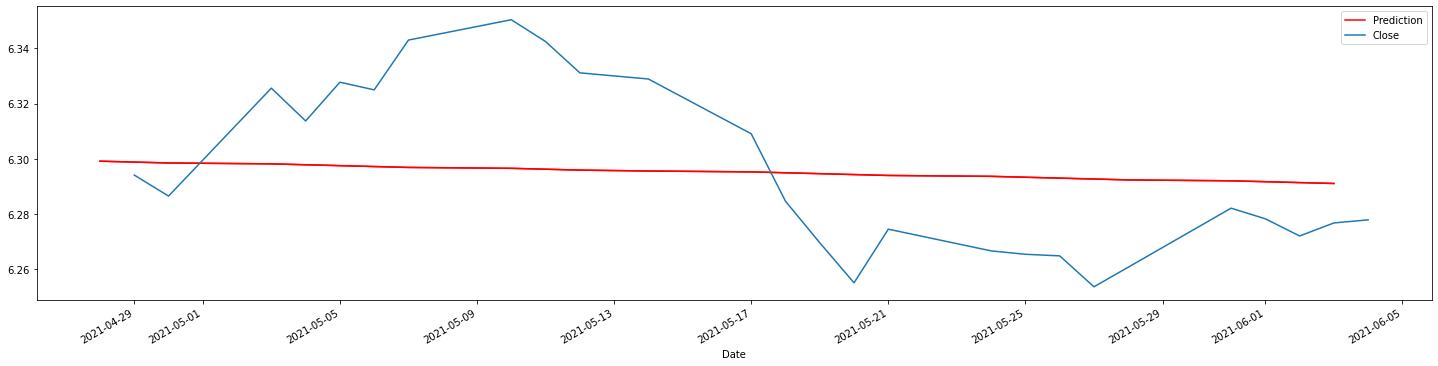

In [52]:
plt.figure(figsize=(25,6))
pred.plot(legend = True, color = 'red', label = 'Prediction')
plt.plot(pred,color = 'red')


test_data.plot(legend = True)


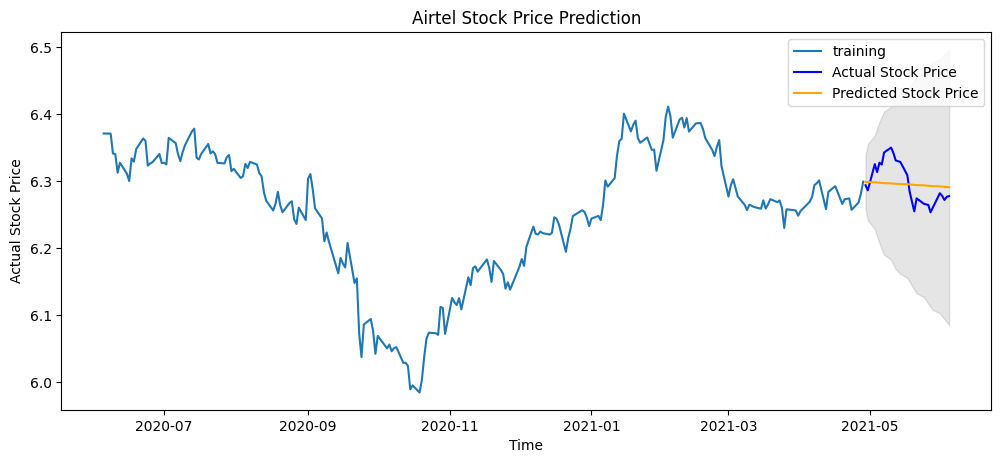

In [65]:
# Considering all the Dates in dataset
fc, se, conf = model.forecast(26, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Airtel Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend()
plt.show()

In [54]:
test_data.mean()

6.294654656894895

In [55]:
# report performance

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mse = mean_squared_error(test_data, pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, pred)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(test_data, pred))
print('RMSE: '+str(rmse))


MSE: 0.0008083025118001747
MAE: 0.02558895609130665
RMSE: 0.028430661473138025


# **Forecasting**

In [ ]:
df_log
df_log.index = df.Date[:end+1]

In [56]:
# Here we are concatenating the train_data and Test_data to help model to read ntire dataset and Forecast future values 
Full_data_train = pd.concat([train_data, test_data])
len(Full_data_train)

250

In [57]:
model2 = ARIMA(train_data, order=(0,1,0))
model2 = model2.fit()
df.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,Date,Close
247,2021-05-31,534.950012
248,2021-06-01,532.900024
249,2021-06-02,529.599976
250,2021-06-03,532.099976
251,2021-06-04,532.700012


In [58]:
index_future_dates =pd.date_range(start='2021-06-04',end= '2021-12-31')
#print(index_future_dates)
pred2 = model2.predict(start = len(test_data), end = len(test_data)+210, typ = 'levels').rename('ARIMA PREDICTIONS')

pred2.index = index_future_dates
print(pred2)


2021-06-04    6.353526
2021-06-05    6.374276
2021-06-06    6.378273
2021-06-07    6.334998
2021-06-08    6.332246
                ...   
2021-12-27    6.296597
2021-12-28    6.296275
2021-12-29    6.295952
2021-12-30    6.295629
2021-12-31    6.295307
Freq: D, Name: ARIMA PREDICTIONS, Length: 211, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


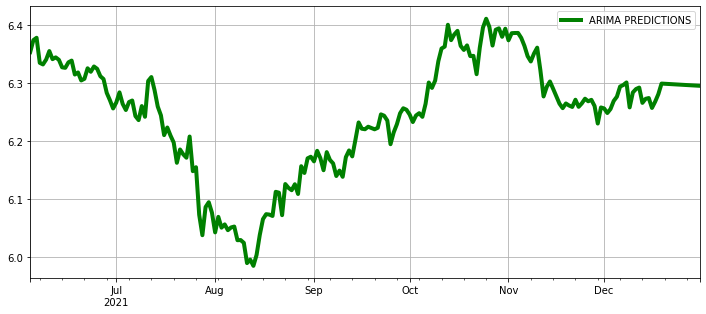

In [76]:
#Below graph shows only Forecast values 
pred2.plot(figsize=(12,5), legend = True, color = 'green', linewidth = 4)
plt.grid()

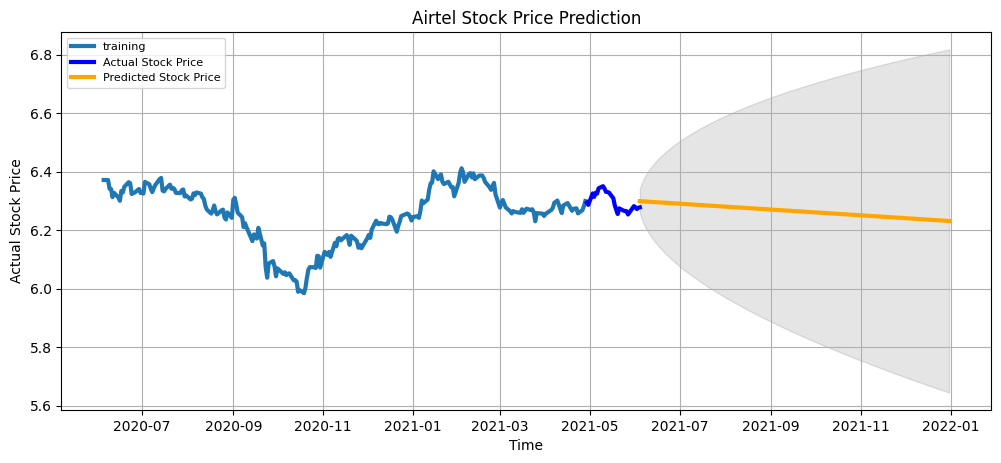

In [75]:
# Both Train_data and Forecast values
fc, se, conf = model.forecast(211, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=index_future_dates)
lower_series = pd.Series(conf[:, 0], index=index_future_dates)
upper_series = pd.Series(conf[:, 1], index=index_future_dates)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training',linewidth = 3)
plt.plot(test_data, color = 'blue', label='Actual Stock Price',linewidth = 3)
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price',linewidth = 3)
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Airtel Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()